<a href="https://colab.research.google.com/github/edyoda/AI-Agent-Development-and-GenAI/blob/main/Day_2_Image_Generation_using_StableDiffusionXL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q diffusers transformers accelerate safetensors huggingface_hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.7 MB/s eta 0:00:00


In [ ]:
import torch
from diffusers import StableDiffusionXLPipeline, StableDiffusionXLImg2ImgPipeline
from huggingface_hub import login
from PIL import Image

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
from getpass import getpass
hf_token = getpass("Enter your Hugging Face token: ")
login(token=hf_token)

Enter your Hugging Face token: ··········


In [ ]:
# Load base model
pipe = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True
).to("cuda")

# Optional: Disable safety checker (if needed)
# pipe.safety_checker = None

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

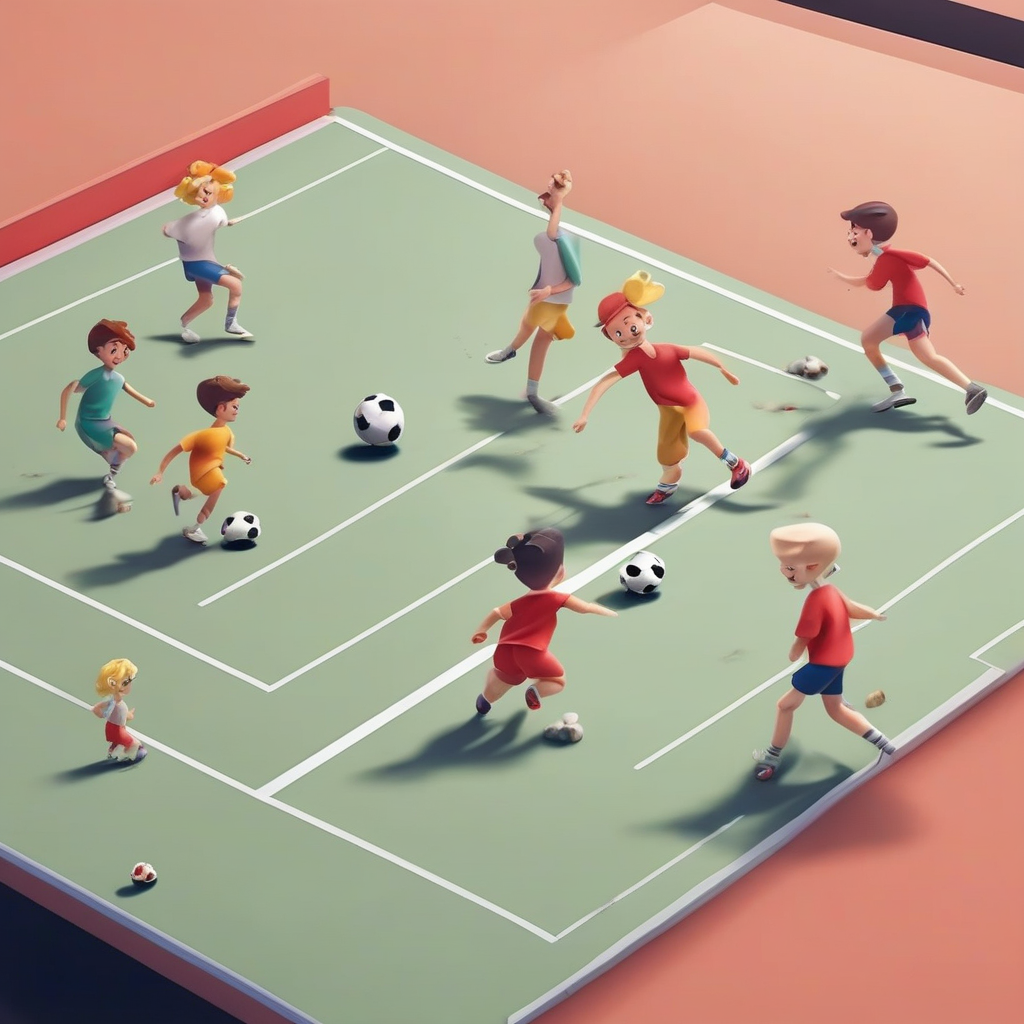

In [ ]:
prompt = """Abstract marketing ad layout (1080*1080) featuring stylized kids playing football, having fun.
Placeholders for top headline, middle subtext, and bottom CTA.
Modern tech design, minimal.
"""
negative_prompt = "text, watermark, signature, deformed shapes, lowres, cluttered, busy patterns, lettering,logo"

image = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=30,  # Increase for better quality (slower)
    guidance_scale=7.5,      # Controls prompt adherence (7-12 recommended)
).images[0]

# Display the image
image

In [ ]:
liked_image = image

In [ ]:
from diffusers import StableDiffusionXLImg2ImgPipeline

# Load Img2Img pipeline
pipe_img2img = StableDiffusionXLImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0",
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True
).to("cuda")

model_index.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

text_encoder_2%2Fconfig.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer_2%2Fspecial_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2%2Fmerges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

unet%2Fconfig.json:   0%|          | 0.00/1.71k [00:00<?, ?B/s]

tokenizer_2%2Ftokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2%2Fvocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

scheduler%2Fscheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/4.52G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

vae%2Fconfig.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
seed = 123456  # Fixed seed for consistent face
generator = torch.manual_seed(seed)

In [ ]:
shirt_colors = [
    "light blue shirt",
    "dark blue shirt",
    "white shirt with subtle pattern",
    "light grey shirt",
    "black formal shirt",
    "navy blue shirt",
    "maroon shirt",
    "olive green shirt",
    "light pink shirt",
    "striped blue and white shirt"
]

In [ ]:
poses = [
    "arms crossed",
    "arms relaxed",
    "hands in pockets",
    "hands clasped in front",
    "leaning slightly forward",
]

In [ ]:
shots = [
    "close-up headshot",
    "medium shot till chest",
    "three-quarter shot",
    "full body shot",
    "bust shot",
]

In [ ]:
expressions = [
    "slight smile",
    "smiling warmly",
    "confident expression",
    "subtle smirk",
    "thoughtful expression"
]

In [ ]:
import itertools

# Define strength for variations
strength = 0.5  # Keeps the face similar but allows variations

# Generate combinations of shirt colors, poses, shots, and expressions
combinations = list(itertools.product(shirt_colors, poses, shots, expressions))
images = []

for i, (shirt, pose, shot, expression) in enumerate(combinations[:20]):  # Limit to first 20 combinations for testing
    mod_prompt = f"A confident Indian man in his 40s, medium tan skin, short and neat black hair, {shirt}, {shot}, {pose}, {expression}, photorealistic, soft lighting, sharp jawline, deep-set brown eyes, plain background, ultra-detailed."

    variation = pipe_img2img(
        prompt=mod_prompt,
        negative_prompt=negative_prompt,
        image=liked_image,
        strength=strength,
        num_inference_steps=30,
        guidance_scale=7.5,
        generator=generator
    ).images[0]

    images.append(variation)
    variation.save(f"variation_{i + 1}.png")
    variation.show()

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

In [ ]:
del pipe

In [ ]:
import torch
torch.cuda.empty_cache()
torch.cuda.reset_max_memory_allocated()

/usr/local/lib/python3.11/dist-packages/torch/cuda/memory.py:365: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  warnings.warn(
